## Multi-Layer Perceptron (MLP) Algorithm

A Multi-Layer Perceptron (MLP) is a class of feedforward artificial neural network (ANN). It consists of at least three layers of nodes: an input layer, one or more hidden layers, and an output layer. Each node, or neuron, in one layer connects with a certain weight to every node in the following layer.

### Key Characteristics:
- **Input Layer**: The layer that receives the input signals.
- **Hidden Layers**: Intermediate layers that process inputs received from the input layer. There can be one or more hidden layers.
- **Output Layer**: The layer that produces the final output of the network.

### Activation Function:
MLPs use activation functions to introduce non-linearity into the model. Common activation functions include:
- Sigmoid
- Hyperbolic Tangent (tanh)
- Rectified Linear Unit (ReLU)

### Training:
MLPs are trained using a supervised learning technique called backpropagation. The training process involves the following steps:
1. **Forward Pass**: Input data is passed through the network to generate an output.
2. **Loss Calculation**: The difference between the predicted output and the actual output is calculated using a loss function.
3. **Backward Pass**: The error is propagated back through the network, and the weights are adjusted to minimize the loss.

### Applications:
MLPs are widely used for various tasks, including:
- Classification
- Regression
- Pattern Recognition
- Time Series Prediction

MLPs are powerful models capable of capturing complex patterns in data, making them a fundamental tool in the field of machine learning and artificial intelligence.

In [1]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

### Datasets Download

In [11]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
wine = fetch_ucirepo(id=109) 
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 
# metadata 
print(wine.metadata) 
# variable information 
print(wine.variables) 

y = y - 1 #djusting the data labels

{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(y_train.shape)

(142, 13)
(142, 1)


### Defining the Model

In [13]:
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dense(32, activation='sigmoid'),
    Dense(len(np.unique(y)), activation='softmax')  # Softmax for multi-class classification
])


c:\Users\raksh\anaconda3\envs\unet_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer=SGD(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Training the Neural Network

In [ ]:
# for given error = 0.01
loss_threshold = 0.01
current_loss = np.inf
history_loss = [] 
epoch = 0

while current_loss > loss_threshold:
    history = model.fit(X_train, y_train, epochs=1, batch_size=16, validation_data=(X_test, y_test), verbose=0)
    current_loss = history.history['loss'][-1]
    history_loss.append(current_loss)
    
    epoch += 1
    print(f"Epoch {epoch}: Loss = {current_loss}")
    if epoch > 1000:
        print("Stopping training: Too many epochs (1000).")
        break

Epoch 1: Loss = 0.06769581139087677
Epoch 2: Loss = 0.06744632124900818
Epoch 3: Loss = 0.06722498685121536
Epoch 4: Loss = 0.06708475202322006
Epoch 5: Loss = 0.06696908175945282
Epoch 6: Loss = 0.06671664863824844
Epoch 7: Loss = 0.06659028679132462
Epoch 8: Loss = 0.066487617790699
Epoch 9: Loss = 0.06624602526426315
Epoch 10: Loss = 0.06616745889186859
Epoch 11: Loss = 0.06599313765764236
Epoch 12: Loss = 0.06574949622154236
Epoch 13: Loss = 0.06558042764663696
Epoch 14: Loss = 0.06540802121162415
Epoch 15: Loss = 0.06523321568965912
Epoch 16: Loss = 0.06520255655050278
Epoch 17: Loss = 0.06493144482374191
Epoch 18: Loss = 0.06479573249816895
Epoch 19: Loss = 0.0646890178322792
Epoch 20: Loss = 0.06446558237075806
Epoch 21: Loss = 0.06430940330028534
Epoch 22: Loss = 0.06412926316261292
Epoch 23: Loss = 0.0640222355723381
Epoch 24: Loss = 0.06388002634048462
Epoch 25: Loss = 0.0637548416852951
Epoch 26: Loss = 0.06353092193603516
Epoch 27: Loss = 0.06337489187717438
Epoch 28: Loss 

## Trained Weights

In [20]:
weights = model.get_weights()
print("Trained Weights:", weights)

Trained Weights: [array([[-2.01098993e-01, -1.01860233e-01, -8.83410126e-02,
         6.15895204e-02,  9.69852582e-02,  6.14666380e-02,
         4.29923385e-01, -2.00716063e-01, -2.05747455e-01,
         4.96152043e-01, -9.14745256e-02,  7.30889440e-02,
         4.99996752e-01,  3.51291299e-01,  1.63421407e-01,
        -3.50628823e-01,  3.37818591e-03, -1.61250219e-01,
        -9.86621603e-02,  2.38145754e-01,  4.62958157e-01,
        -6.07983530e-01,  1.68784529e-01,  9.93010476e-02,
         1.47034585e-01, -4.41570908e-01,  2.24269122e-01,
         3.84951055e-01,  2.42941737e-01,  1.70089602e-01,
        -2.93288320e-01,  7.45804161e-02,  5.52404858e-02,
         9.46962237e-02, -2.65604883e-01,  3.27811748e-01,
         1.65710479e-01,  5.57891607e-01, -1.39918372e-01,
         2.71271825e-01, -1.80721998e-01,  2.99062014e-01,
        -1.18684463e-01,  4.51416261e-02, -2.44193494e-01,
         3.03694516e-01,  5.16604304e-01, -1.59560561e-01,
        -5.96652590e-02, -1.87681973e-

## Plotting the Error vs Epoch graph

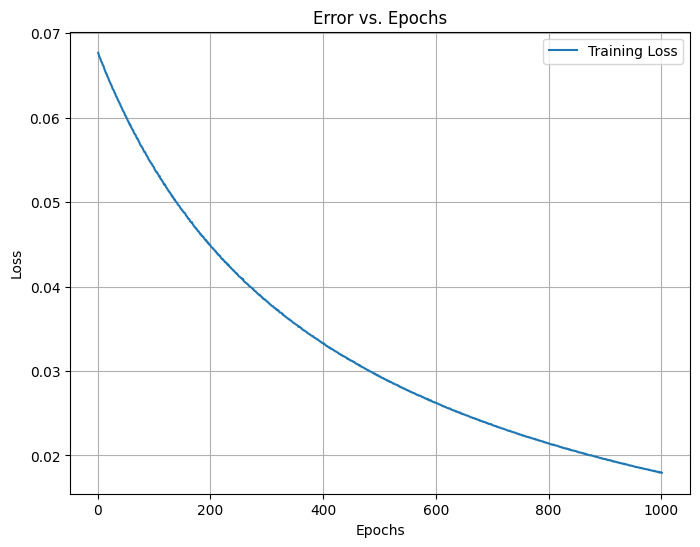

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(history_loss) + 1), history_loss, label='Training Loss')
plt.title('Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()